<a href="https://colab.research.google.com/github/SamNdirangu/Image-Classification-Mnist/blob/master/Mnist_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification of the fashion mnist dataset using SVMs

The 2d image arrays are flattened to a 1d array which is then fed to the SVM

### Step 1: Import all required libraries

In [6]:
pip install cython

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras: Ease our import of the dataset
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

### Step 2: Import the Dataset

In [0]:
#Using Keras we import the dataset and store it.
fashion_mnist = keras.datasets.fashion_mnist
#The data is already split into Train and test sets
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


Split the dataset further we dont need 50000 for SVMs so we can split the train images into a further training set.

In [4]:
#We split it even further SVMs dont need a lot of data to train
from sklearn.model_selection import train_test_split

#Ensure to stratify so were able to have all classes in one set
X_train, X_test, y_train, y_test = train_test_split(train_images, train_labels,
                                                   test_size = 0.98,
                                                   random_state = 0,
                                                   stratify = train_labels)

#Define our ClassNames
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(X_train.shape)
print(len(y_train)) #We have 12 thousand samples

(1200, 28, 28)
1200


### Do A bit of exploring

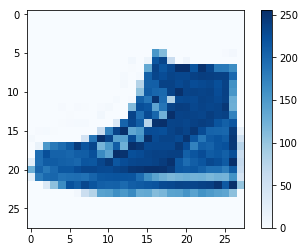

In [22]:
plt.figure()
plt.imshow(X_train[0], cmap ="Blues")
plt.colorbar()
plt.grid(False)
plt.show()

Scale the values from 0 to 1, this aids in convergence speed

In [0]:
X_train = X_train / 255.0

X_test = X_test / 255.0

Plot a few of them and see how they look

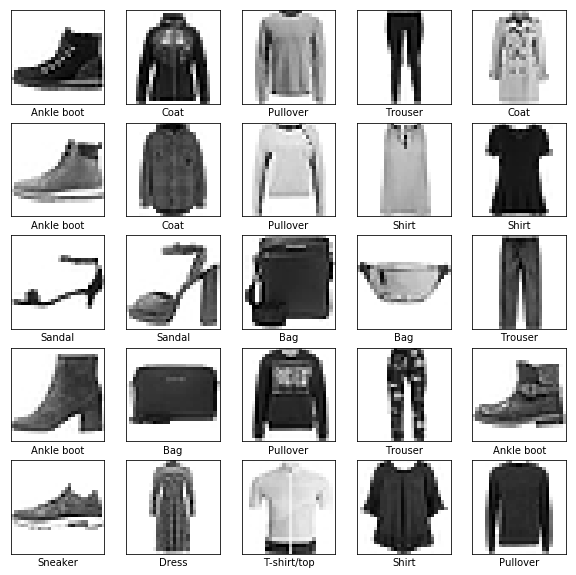

In [21]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

### Good so far we now
Flatten the 2D Arrays to 1D

In [0]:
# Creates a list containing 5 lists, each of 8 items, all set to 0
h, w = len(X_train), 784;
X_trainF = [[0 for x in range(w)] for y in range(h)]

In [0]:
X_trainF = np.asarray(X_trainF)
for i in range(len(X_trainF)):
  X_trainF[i] = X_train[i].flatten()


# Step 3 Train the SVM Model

In [8]:
# Fitting Kernel SVM to the Training set

from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_trainF, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

### Test the Model
Flatten the test set first

In [0]:
# Creates a list containing 5 lists, each of 8 items, all set to 0
h, w = len(X_test), 784;
X_testF = [[0 for x in range(w)] for y in range(h)]

X_testF = np.asarray(X_testF)
for i in range(len(X_trainF)):
  X_testF[i] = X_test[i].flatten()

Perform predictions

In [20]:
# Predicting the Test set results
y_pred = classifier.predict(X_testF[1:100])
y_pred.shape

(99,)

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test[1:100], y_pred)

In [0]:
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements 

Perform Single Predictions

In [22]:
accuracy(cm)

0.1919191919191919